# Generate results plots

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

## Relations evaluated for

In [31]:
relations = {"P17": "located-in",
             "P19": "born-in", 
             "P20": "died-in", 
             "P27": "citizen-of",
             "P30": "located-in-continent",
             "P36": "capital-of",
             #"P37": "official-language",
             #"P39": "has-position",
             #"P47": "shares-border-with",
             "P101": "specializes-in",
             "P103": "native-language",
             "P106": "is-a-by-profession",
             #"P108": "works-for",
             "P127": "owned-by",
             "P131": "located-in",
             "P136": "plays-music",
             "P138": "named-after",
             "P140": "affiliated-with-religion",
             "P159": "headquarter-in",
             "P176": "produced-by",
             "P178": "developed-by",
             #"P190": "twin-city-of",
             "P264": "represented-by-music-label",
             "P276": "located-in",
             "P279": "subclass-of", 
             "P361": "part-of",
             "P364": "original-language",
             "P407": "written-in-language",
             "P413": "plays-in-position",
             "P449": "originally-aired-on",
             #"P463": "member-of",
             "P495": "created-in",
             #"P530": "has-diplomatic-relations-with",
             "P740": "founded-in",
             "P937": "worked-in",
             #"P1001": "legal-term-in",
             #"P1303": "is-a-player",
             "P1376": "capital-of",
             "P1412": "communicated-in"}
assert len(relations)==30

In [3]:
relations_options_classification = {"ok": ["P17",
                                            "P27",
                                            "P30",
                                            "P36",
                                            "P37",
                                            "P103",
                                            "P127",
                                            "P176",
                                            "P178",
                                            "P264",
                                            "P364",
                                            "P407",
                                            "P413",
                                            "P495",
                                            "P449",
                                            "P1376",
                                            "P1412",
                                            ],
                                    "small issues": ["P106",
                                            "P138",
                                            "P140",
                                            "P279",
                                            "P361",
                                            ],
                                    "medium issues": ["P19",
                                            "P20",
                                            "P131",
                                            "P159",
                                            "P276",
                                            "P740",
                                            "P937"
                                            ],
                                    "big issues": ["P101",
                                            "P136"]
                                    }

## Read and format data

In [32]:
data = pd.read_csv("data/results/new/2023_08_14_bert_base_with_1_passages.csv")
data.head()

,Name,State,Notes,User,Tags,Created,Runtime,Sweep,lm,pattern,...,corr_retriever_rank_pred_gold,retriever_rank_pred_std,retriever_embedding_similarity_consistency_std,retriever_embedding_similarity_match_consistency_std,retriever_embedding_similarity_no_match_consistency_std,retriever_rank_gold_match_std,retriever_rank_gold_no_match_std,retriever_rank_gold_std,retriever_rank_pred_match_std,retriever_rank_pred_no_match_std
0,P937_consistency_probe_atlas-base,finished,-,lovhagstrom,"1-passages, P937, probe",2023-08-14T07:44:46.000Z,30,NaN,atlas-base-1-passage,P937,...,0.634787,31.270374,0.036054,0.034705,0.038364,33.347559,28.276191,32.148683,33.594012,23.746580
1,P740_consistency_probe_atlas-base,finished,-,lovhagstrom,"1-passages, P740, probe",2023-08-14T07:39:34.000Z,305,NaN,atlas-base-1-passage,P740,...,0.569308,49.108942,0.052457,0.049760,0.052451,47.230249,47.205614,50.697097,46.992927,42.986102
2,P495_consistency_probe_atlas-base,finished,-,lovhagstrom,"1-passages, P495, probe",2023-08-14T07:30:50.000Z,517,NaN,atlas-base-1-passage,P495,...,0.562683,15.628988,0.052728,0.051636,0.052240,19.086804,18.650711,19.822193,16.156593,13.643785
3,P449_consistency_probe_atlas-base,finished,-,lovhagstrom,"1-passages, P449, probe",2023-08-14T07:28:25.000Z,139,NaN,atlas-base-1-passage,P449,...,0.541985,4.920697,0.056972,0.053551,0.058354,5.747529,5.721722,5.921962,6.025276,3.714607
4,P413_consistency_probe_atlas-base,finished,-,lovhagstrom,"1-passages, P413, probe",2023-08-14T07:27:45.000Z,33,NaN,atlas-base-1-passage,P413,...,0.684781,3.439764,0.053394,0.053812,0.052232,4.198650,4.696905,4.767616,3.074939,2.851778


In [33]:
data.columns

Index(['Name', 'State', 'Notes', 'User', 'Tags', 'Created', 'Runtime', 'Sweep',
       'lm', 'pattern', 'all_edges', 'avg_consistency_by_edge_out',
       'avg_entropy', 'both_consistency', 'both_edges', 'consistency',
       'consistent_subjects', 'group-unacc', 'k_knowledgable_consistency',
       'knowledgable_consistency', 'lama_acc', 'lama_group_acc',
       'lexical_consistency', 'n_patterns', 'no_change_consistency',
       'retriever_id_consistency', 'retriever_id_consistency_std',
       'retriever_id_match_consistency', 'retriever_id_match_consistency_std',
       'retriever_id_no_match_consistency',
       'retriever_id_no_match_consistency_std', 'retriever_title_consistency',
       'retriever_title_consistency_std',
       'retriever_title_match_consistency_std',
       'retriever_title_match_consistency',
       'retriever_title_no_match_consistency',
       'retriever_title_no_match_consistency_std', 'successful_patterns',
       'successful_subjects', 'syntactic_consist

Fix LLAMA size notations

In [20]:
def get_llama_name(row):
    llama_sizes = {"7b", "13b", "30b", "65b"}
    size = [size for size in llama_sizes if size in row.Tags.split(", ")][0]
    return f"llama-{size}"

data["lm"] = data.apply(lambda row: row.lm if not row.lm=="llama" else get_llama_name(row), axis=1)

Assert that all relations have been covered

In [34]:
print(data.lm.value_counts())

atlas-base-1-passage    30
Name: lm, dtype: int64


In [35]:
for lm in data.lm.unique():
    print(f"Checking {lm}...")
    missing_relations = []
    for relation in relations.keys():
        if not relation in data[data.lm==lm].pattern.values:
            missing_relations += [relation]
    if len(missing_relations) > 0:
        print(f"\tMissing results for {missing_relations}")
    else:
        print("\tOk!")

Checking atlas-base-1-passage...
	Ok!


If wish to drop relations for which atlas-base tuned has no results

In [8]:
print("Dropping relation values for which we have no Atlas results")
orig_len = len(data)
rels_without_atlas_results = ["P138", "P127"] #data[data.lm=="bert-base-cased"].pattern[~(data[data.lm=="bert-base-cased"].pattern.isin(data[data.lm=="atlas-base-tuned"].pattern))].values
print(f"These are: {rels_without_atlas_results}")
data = data[~(data.pattern.isin(rels_without_atlas_results))]
print(f"The dataset now contains {orig_len-len(data)} less entries")

Dropping relation values for which we have no Atlas results
These are: ['P138', 'P127']
The dataset now contains 12 less entries


## Print results

In [8]:
data["options_quality"] = [None]*len(data)
for key, val in relations_options_classification.items():
    for rel in val:
        data.loc[data["pattern"]==rel, "options_quality"] = key
        

In [36]:
def get_mean_std_string(row):
    return f"${row.loc['mean']:.2f} \pm {row.loc['std']:.2f}$"

### Per options quality category

In [10]:
data.groupby(["lm","options_quality"]).agg({"consistency": ["count", "mean", "std"], "lama_acc": ["mean", "std"], "lama_group_acc": ["mean", "std"], "k_knowledgable_consistency": ["mean", "std"], "knowledgable_consistency": ["mean", "std"],"unknowledgable_consistency": ["mean", "std"]}).reindex(index=["ok","small issues","medium issues","big issues"],level=1)

consistency                      lama_acc  \
                                 count      mean       std      mean   
lm         options_quality                                             
atlas-base ok                       16  0.747469  0.150463  0.834418   
           small issues              5  0.683112  0.125305  0.550918   
           medium issues             7  0.751614  0.075835  0.803576   
           big issues                2  0.430475  0.101956  0.704422   

                                     lama_group_acc            \
                                 std           mean       std   
lm         options_quality                                      
atlas-base ok               0.097968       0.448548  0.268208   
           small issues     0.189045       0.314972  0.158128   
           medium issues    0.056506       0.470045  0.201020   
           big issues       0.061569       0.055551  0.060408   

                           k_knowledgable_consistency            \
                                                 mean       std   
lm         options_quality                                        
atlas-base ok                                0.715182  0.160887   
           small issues                      0.639126  0.181677   
           medium issues                     0.730950  0.079595   
           big issues                        0.376361  0.092409   

                           knowledgable_consistency            \
                                               mean       std   
lm         options_quality                                      
atlas-base ok                              0.758047  0.146371   
           small issues                    0.703582  0.134544   
           medium issues                   0.772494  0.069997   
           big issues                      0.450735  0.096179   

                           unknowledgable_consistency            
                                                 mean       std  
lm         options_quality                                       
atlas-base ok                                0.583728  0.197786  
           small issues                      0.579413  0.129407  
           medium issues                     0.545828  0.161369  
           big issues                        0.327817  0.128675

In [80]:
data.groupby(["lm","options_quality"]).agg({"consistency": ["mean", "std", "count"], "lama_acc": ["mean", "std"]}).reindex(index=["ok","small issues","medium issues","big issues"],level=1)

consistency            \
                                                              mean       std   
lm                                     options_quality                         
atlas-base-fixed-retrieval-semi-random ok                 0.650397  0.216350   
                                       small issues       0.602653  0.305375   
                                       medium issues      0.580244  0.159656   
                                       big issues         0.369684  0.033522   

                                                              lama_acc  \
                                                       count      mean   
lm                                     options_quality                   
atlas-base-fixed-retrieval-semi-random ok                 16  0.504059   
                                       small issues        5  0.358790   
                                       medium issues       7  0.296120   
                                       big issues          2  0.383779   

                                                                  
                                                             std  
lm                                     options_quality            
atlas-base-fixed-retrieval-semi-random ok               0.223290  
                                       small issues     0.327011  
                                       medium issues    0.118688  
                                       big issues       0.330205

Format for latex

In [37]:
tmp_data = data.groupby(["lm","options_quality"]).agg({"consistency": ["mean", "std"], "lama_acc": ["mean", "std"], "lama_group_acc": ["mean", "std"]}).reindex(index=["ok","small issues","medium issues","big issues"],level=1)
print_data = pd.concat((tmp_data.consistency.apply(get_mean_std_string, axis=1), tmp_data.lama_acc.apply(get_mean_std_string, axis=1), tmp_data.lama_group_acc.apply(get_mean_std_string, axis=1)), axis=1, keys=["consistency", "accuracy", "lama_group_acc"])
print(print_data.to_latex(escape = False))

KeyError: 'options_quality'

### Across all relations

In [11]:
data.groupby(["lm"]).agg({"consistency": ["mean", "std", "count"], "lama_acc": ["mean", "std"], "lama_group_acc": ["mean", "std"], "knowledgable_consistency": ["mean", "std"],"unknowledgable_consistency": ["mean", "std"]})

consistency                 lama_acc           lama_group_acc  \
                  mean      std count      mean       std           mean   
lm                                                                         
atlas-base    0.716577  0.14861    30  0.771305  0.147705       0.405101   

                     knowledgable_consistency            \
                 std                     mean       std   
lm                                                        
atlas-base  0.247042                 0.731853  0.145864   

           unknowledgable_consistency            
                                 mean       std  
lm                                               
atlas-base                   0.557105  0.180653

Format for latex

In [38]:
tmp_data = data.groupby(["lm"]).agg({"consistency": ["mean", "std"], "lama_acc": ["mean", "std"], "lama_group_acc": ["mean", "std"], "knowledgable_consistency": ["mean", "std"], "k_knowledgable_consistency": ["mean", "std"], "unknowledgable_consistency": ["mean", "std"]})
cols = tmp_data.columns.get_level_values(0).unique()
data_to_concat = (tmp_data[col].apply(get_mean_std_string, axis=1) for col in cols)
print_data = pd.concat(data_to_concat, axis=1, keys=cols)
print(print_data.to_latex(escape=False))

\begin{tabular}{lllllll}
\toprule
{} &      consistency &         lama_acc &   lama_group_acc & knowledgable_consistency & k_knowledgable_consistency & unknowledgable_consistency \\
lm                   &                  &                  &                  &                          &                            &                            \\
\midrule
atlas-base-1-passage &  $0.63 \pm 0.15$ &  $0.67 \pm 0.15$ &  $0.31 \pm 0.20$ &          $0.66 \pm 0.14$ &            $0.60 \pm 0.16$ &            $0.50 \pm 0.17$ \\
\bottomrule
\end{tabular}



/var/folders/3k/sg837cp921q0m6v8hdxlxrbwfb5x0c/T/ipykernel_25259/3599109845.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(print_data.to_latex(escape=False))


### Retrieval analysis

In [39]:
tmp_data = data[data.lm.isin({"atlas-base", "atlas-large", "atlas-base-1-passage"})]
cols_of_interest = ["retriever_id_consistency", "retriever_id_consistency_std", "retriever_id_match_consistency", "retriever_id_no_match_consistency"]
tmp_data.groupby(["lm"]).agg({col: ["mean", "std"] for col in cols_of_interest})


retriever_id_consistency            \
                                         mean       std   
lm                                                        
atlas-base-1-passage                 0.552197  0.120469   

                     retriever_id_consistency_std            \
                                             mean       std   
lm                                                            
atlas-base-1-passage                     0.482313  0.025333   

                     retriever_id_match_consistency            \
                                               mean       std   
lm                                                              
atlas-base-1-passage                       0.699495  0.137404   

                     retriever_id_no_match_consistency            
                                                  mean       std  
lm                                                                
atlas-base-1-passage                          0.286689  0.094495

In [40]:
cols_of_interest = ["retriever_id_consistency", "retriever_id_consistency_std", "retriever_id_match_consistency", "retriever_id_no_match_consistency"]
tmp_data = data[data.lm.isin({"atlas-base", "atlas-large", "atlas-base-1-passage"})].groupby(["lm"]).agg({col: ["mean", "std"] for col in cols_of_interest})
cols = tmp_data.columns.get_level_values(0).unique()
data_to_concat = (tmp_data[col].apply(get_mean_std_string, axis=1) for col in cols)
print_data = pd.concat(data_to_concat, axis=1, keys=cols)
print(print_data.to_latex(escape=False))

\begin{tabular}{lllll}
\toprule
{} & retriever_id_consistency & retriever_id_consistency_std & retriever_id_match_consistency & retriever_id_no_match_consistency \\
lm                   &                          &                              &                                &                                   \\
\midrule
atlas-base-1-passage &          $0.55 \pm 0.12$ &              $0.48 \pm 0.03$ &                $0.70 \pm 0.14$ &                   $0.29 \pm 0.09$ \\
\bottomrule
\end{tabular}



/var/folders/3k/sg837cp921q0m6v8hdxlxrbwfb5x0c/T/ipykernel_25259/418976559.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(print_data.to_latex(escape=False))


In [42]:
cols_of_interest = ["retriever_title_consistency", "retriever_title_consistency_std", "retriever_title_match_consistency", "retriever_title_no_match_consistency"]
tmp_data = data[data.lm.isin({"atlas-base", "atlas-large", "atlas-base-1-passage"})].groupby(["lm"]).agg({col: ["mean", "std"] for col in cols_of_interest})
cols = tmp_data.columns.get_level_values(0).unique()
data_to_concat = (tmp_data[col].apply(get_mean_std_string, axis=1) for col in cols)
print_data = pd.concat(data_to_concat, axis=1, keys=cols)
print(print_data.to_latex(escape=False))

\begin{tabular}{lllll}
\toprule
{} & retriever_title_consistency & retriever_title_consistency_std & retriever_title_match_consistency & retriever_title_no_match_consistency \\
lm                   &                             &                                 &                                   &                                      \\
\midrule
atlas-base-1-passage &             $0.61 \pm 0.11$ &                 $0.47 \pm 0.03$ &                   $0.75 \pm 0.13$ &                      $0.36 \pm 0.10$ \\
\bottomrule
\end{tabular}



/var/folders/3k/sg837cp921q0m6v8hdxlxrbwfb5x0c/T/ipykernel_25259/4086681421.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(print_data.to_latex(escape=False))


In [23]:
data.corr_consistency_retriever_title_consistency.isna().any()

True

In [43]:
cols_of_interest = ["retriever_embedding_similarity_consistency", "retriever_embedding_similarity_consistency_std", "retriever_embedding_similarity_match_consistency", "retriever_embedding_similarity_no_match_consistency"]
tmp_data = data[data.lm.isin({"atlas-base", "atlas-large", "atlas-base-1-passage"})].groupby(["lm"]).agg({col: ["mean", "std"] for col in cols_of_interest})
cols = tmp_data.columns.get_level_values(0).unique()
data_to_concat = (tmp_data[col].apply(get_mean_std_string, axis=1) for col in cols)
print_data = pd.concat(data_to_concat, axis=1, keys=cols)
print(print_data.to_latex(escape=False))

\begin{tabular}{lllll}
\toprule
{} & retriever_embedding_similarity_consistency & retriever_embedding_similarity_consistency_std & retriever_embedding_similarity_match_consistency & retriever_embedding_similarity_no_match_consistency \\
lm                   &                                            &                                                &                                                  &                                                     \\
\midrule
atlas-base-1-passage &                            $0.88 \pm 0.04$ &                                $0.05 \pm 0.02$ &                                  $0.89 \pm 0.04$ &                                    $0.87 \pm 0.04$ \\
\bottomrule
\end{tabular}



/var/folders/3k/sg837cp921q0m6v8hdxlxrbwfb5x0c/T/ipykernel_25259/392024938.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(print_data.to_latex(escape=False))


Correlations

In [24]:
corr_cols = {'corr_consistency_retriever_emb_consistency': ('consistency', 'embedding'),
            'corr_consistency_retriever_id_consistency': ('consistency', 'id'),
            'corr_consistency_retriever_title_consistency': ('consistency', 'title'),
            'corr_retriever_emb_id_consistency': ('embedding', 'id'),
            'corr_retriever_emb_title_consistency': ('embedding', 'title'),
            'corr_retriever_id_title_consistency': ('id', 'title')}
cols_of_interest = corr_cols.keys()
lm = "atlas-base"
tmp_data = data[data.lm==lm].fillna(0).groupby(["lm"]).agg({col: ["mean", "std"] for col in cols_of_interest})

unique_cols = ['consistency', 'id', 'title', 'embedding']
corr_data = pd.DataFrame(np.ones((len(unique_cols), len(unique_cols))), columns=unique_cols, index=unique_cols)
for col, vals in corr_cols.items():
    corr_data.at[vals[0], vals[1]] = get_mean_std_string(tmp_data[col].loc[lm])
    corr_data.at[vals[1], vals[0]] = get_mean_std_string(tmp_data[col].loc[lm])
# fix diagonal
for col in unique_cols:
    corr_data.at[col, col] = "$1.00 \pm 0.00$"
corr_data

,consistency,id,title,embedding
consistency,$1.00 \pm 0.00$,$0.22 \pm 0.09$,$0.22 \pm 0.09$,$0.15 \pm 0.11$
id,$0.22 \pm 0.09$,$1.00 \pm 0.00$,$0.92 \pm 0.03$,$0.43 \pm 0.10$
title,$0.22 \pm 0.09$,$0.92 \pm 0.03$,$1.00 \pm 0.00$,$0.39 \pm 0.09$
embedding,$0.15 \pm 0.11$,$0.43 \pm 0.10$,$0.39 \pm 0.09$,$1.00 \pm 0.00$


In [25]:
print(corr_data.to_latex(escape=False))

\begin{tabular}{lllll}
\toprule
{} &      consistency &               id &            title &        embedding \\
\midrule
consistency &  $1.00 \pm 0.00$ &  $0.22 \pm 0.09$ &  $0.22 \pm 0.09$ &  $0.15 \pm 0.11$ \\
id          &  $0.22 \pm 0.09$ &  $1.00 \pm 0.00$ &  $0.92 \pm 0.03$ &  $0.43 \pm 0.10$ \\
title       &  $0.22 \pm 0.09$ &  $0.92 \pm 0.03$ &  $1.00 \pm 0.00$ &  $0.39 \pm 0.09$ \\
embedding   &  $0.15 \pm 0.11$ &  $0.43 \pm 0.10$ &  $0.39 \pm 0.09$ &  $1.00 \pm 0.00$ \\
\bottomrule
\end{tabular}



/var/folders/3k/sg837cp921q0m6v8hdxlxrbwfb5x0c/T/ipykernel_25259/192609993.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(corr_data.to_latex(escape=False))


### Retrieval frequency rank analysis

Get number of options

In [26]:
options_folder = "data/all_n1_atlas"
num_options = {} 
for pattern in data.pattern.unique():
    options_filepath = os.path.join(options_folder, f"{pattern}_options.txt")
    with open(options_filepath, "r") as f:
        num_options[pattern] = len([line for line in f.readlines()])
        
num_options

{'P449': 19,
 'P20': 170,
 'P937': 92,
 'P740': 186,
 'P495': 67,
 'P413': 14,
 'P407': 42,
 'P36': 250,
 'P364': 40,
 'P361': 274,
 'P30': 5,
 'P27': 97,
 'P279': 395,
 'P276': 242,
 'P264': 12,
 'P19': 229,
 'P17': 96,
 'P178': 23,
 'P176': 43,
 'P159': 189,
 'P1412': 38,
 'P140': 10,
 'P138': 280,
 'P1376': 159,
 'P136': 24,
 'P131': 209,
 'P127': 194,
 'P106': 31,
 'P103': 30,
 'P101': 94}

In [55]:
data.lm.name

'lm'

In [44]:
cols_of_interest = ["retriever_rank_pred", "retriever_rank_pred_match", "retriever_rank_pred_no_match"]
tmp_data = data[data.lm.isin({"atlas-base", "atlas-large", "atlas-base-1-passage"})].copy()
for col in cols_of_interest:
    tmp_data[col] = tmp_data.apply(lambda row: (row[col]-1)/(num_options[row.pattern]-1), axis=1)
tmp_data = tmp_data.groupby(["lm"]).agg({col: ["mean", "std"] for col in cols_of_interest})
cols = tmp_data.columns.get_level_values(0).unique()
data_to_concat = (tmp_data[col].apply(get_mean_std_string, axis=1) for col in cols_of_interest)
print_data = pd.concat(data_to_concat, axis=1, keys=cols_of_interest)
print(print_data.to_latex(escape=False))

\begin{tabular}{llll}
\toprule
{} & retriever_rank_pred & retriever_rank_pred_match & retriever_rank_pred_no_match \\
lm                   &                     &                           &                              \\
\midrule
atlas-base-1-passage &     $0.25 \pm 0.10$ &           $0.20 \pm 0.12$ &              $0.34 \pm 0.07$ \\
\bottomrule
\end{tabular}



/var/folders/3k/sg837cp921q0m6v8hdxlxrbwfb5x0c/T/ipykernel_25259/2394838606.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(print_data.to_latex(escape=False))


Compare against un-normalized case:

atlas-base  &     $9.07 \pm 8.08$ &           $5.37 \pm 4.06$ &            $19.69 \pm 16.72$ \\

atlas-large &     $8.23 \pm 6.71$ &           $5.14 \pm 3.74$ &            $20.14 \pm 16.79$ \\

In [45]:
cols_of_interest = ["retriever_rank_gold", "retriever_rank_gold_match", "retriever_rank_gold_no_match"]
tmp_data = data[data.lm.isin({"atlas-base", "atlas-large", "atlas-base-1-passage"})].copy()
for col in cols_of_interest:
    tmp_data[col] = tmp_data.apply(lambda row: (row[col]-1)/(num_options[row.pattern]-1), axis=1)
tmp_data = tmp_data.groupby(["lm"]).agg({col: ["mean", "std"] for col in cols_of_interest})
data_to_concat = (tmp_data[col].apply(get_mean_std_string, axis=1) for col in cols_of_interest)
print_data = pd.concat(data_to_concat, axis=1, keys=cols_of_interest)
print(print_data.to_latex(escape=False))

\begin{tabular}{llll}
\toprule
{} & retriever_rank_gold & retriever_rank_gold_match & retriever_rank_gold_no_match \\
lm                   &                     &                           &                              \\
\midrule
atlas-base-1-passage &     $0.26 \pm 0.11$ &           $0.21 \pm 0.11$ &              $0.35 \pm 0.11$ \\
\bottomrule
\end{tabular}



/var/folders/3k/sg837cp921q0m6v8hdxlxrbwfb5x0c/T/ipykernel_25259/3495987541.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(print_data.to_latex(escape=False))


Compare against unnormalized case:

atlas-base  &     $6.94 \pm 5.53$ &           $5.30 \pm 4.38$ &            $13.02 \pm 10.98$

atlas-large &     $7.06 \pm 5.87$ &           $5.41 \pm 4.45$ &            $14.38 \pm 12.93$

Correlations

In [48]:
corr_cols = {'corr_consistency_retriever_rank_pred': ('consistency', 'rank_pred'),
            'corr_consistency_retriever_rank_gold': ('consistency', 'rank_gold'),
            'corr_retriever_rank_pred_gold': ('rank_pred','rank_gold')
            }
cols_of_interest = corr_cols.keys()
lm = "atlas-base"
tmp_data = data[data.lm==lm].fillna(0).groupby(["lm"]).agg({col: ["mean", "std"] for col in cols_of_interest})

unique_cols = ['consistency', 'rank_pred', 'rank_gold']
corr_data = pd.DataFrame(np.ones((len(unique_cols), len(unique_cols))), columns=unique_cols, index=unique_cols)
for col, vals in corr_cols.items():
    corr_data.at[vals[0], vals[1]] = get_mean_std_string(tmp_data[col].loc[lm])
    corr_data.at[vals[1], vals[0]] = get_mean_std_string(tmp_data[col].loc[lm])
# fix diagonal
for col in unique_cols:
    corr_data.at[col, col] = "$1.00 \pm 0.00$"
print(corr_data.to_latex(escape=False))

\begin{tabular}{llll}
\toprule
{} &       consistency &         rank_pred &         rank_gold \\
\midrule
consistency &   $1.00 \pm 0.00$ &  $-0.34 \pm 0.12$ &  $-0.18 \pm 0.10$ \\
rank_pred   &  $-0.34 \pm 0.12$ &   $1.00 \pm 0.00$ &   $0.51 \pm 0.16$ \\
rank_gold   &  $-0.18 \pm 0.10$ &   $0.51 \pm 0.16$ &   $1.00 \pm 0.00$ \\
\bottomrule
\end{tabular}



/var/folders/3k/sg837cp921q0m6v8hdxlxrbwfb5x0c/T/ipykernel_60402/2136752848.py:17: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(corr_data.to_latex(escape=False))


### Per relation

In [125]:
data["plot_pattern"] = data.pattern.apply(lambda val: f"{relations[val]} ({val})") 

In [126]:
data.pivot(index=["options_quality", "plot_pattern"], columns="lm", values=["consistency", "lama_acc", "lama_group_acc", "knowledgable_consistency", "unknowledgable_consistency"])

consistency  \
lm                                                atlas-base-closed-book-from-likelihood   
options_quality plot_pattern                                                               
big issues      plays-music (P136)                                              0.619603   
                specializes-in (P101)                                           0.201324   
medium issues   born-in (P19)                                                   0.390501   
                died-in (P20)                                                   0.270983   
                founded-in (P740)                                               0.537719   
                headquarter-in (P159)                                           0.516325   
                located-in (P131)                                               0.675269   
                located-in (P276)                                               0.604348   
                worked-in (P937)                                                0.772596   
ok              capital-of (P1376)                                              0.765246   
                capital-of (P36)                                                0.736624   
                citizen-of (P27)                                                0.649066   
                communicated-in (P1412)                                         0.648590   
                created-in (P495)                                               0.604024   
                developed-by (P178)                                             0.798756   
                located-in (P17)                                                0.842857   
                located-in-continent (P30)                                      0.632984   
                native-language (P103)                                          0.847510   
                original-language (P364)                                        0.892267   
                originally-aired-on (P449)                                      0.315266   
                owned-by (P127)                                                 0.413961   
                plays-in-position (P413)                                        0.153887   
                produced-by (P176)                                              0.908957   
                represented-by-music-label (P264)                               0.287918   
                written-in-language (P407)                                      0.784815   
small issues    affiliated-with-religion (P140)                                 0.341232   
                is-a-by-profession (P106)                                       0.224769   
                named-after (P138)                                              0.826027   
                part-of (P361)                                                  0.815249   
                subclass-of (P279)                                              0.783854   

                                                                              \
lm                                                atlas-base-from-likelihood   
options_quality plot_pattern                                                   
big issues      plays-music (P136)                                  0.380708   
                specializes-in (P101)                               0.545823   
medium issues   born-in (P19)                                       0.753102   
                died-in (P20)                                       0.697674   
                founded-in (P740)                                   0.768905   
                headquarter-in (P159)                               0.819992   
                located-in (P131)                                   0.899355   
                located-in (P276)                                   0.720290   
                worked-in (P937)                                    0.850721   
ok              capital-of (P1376)                                  0.636720   


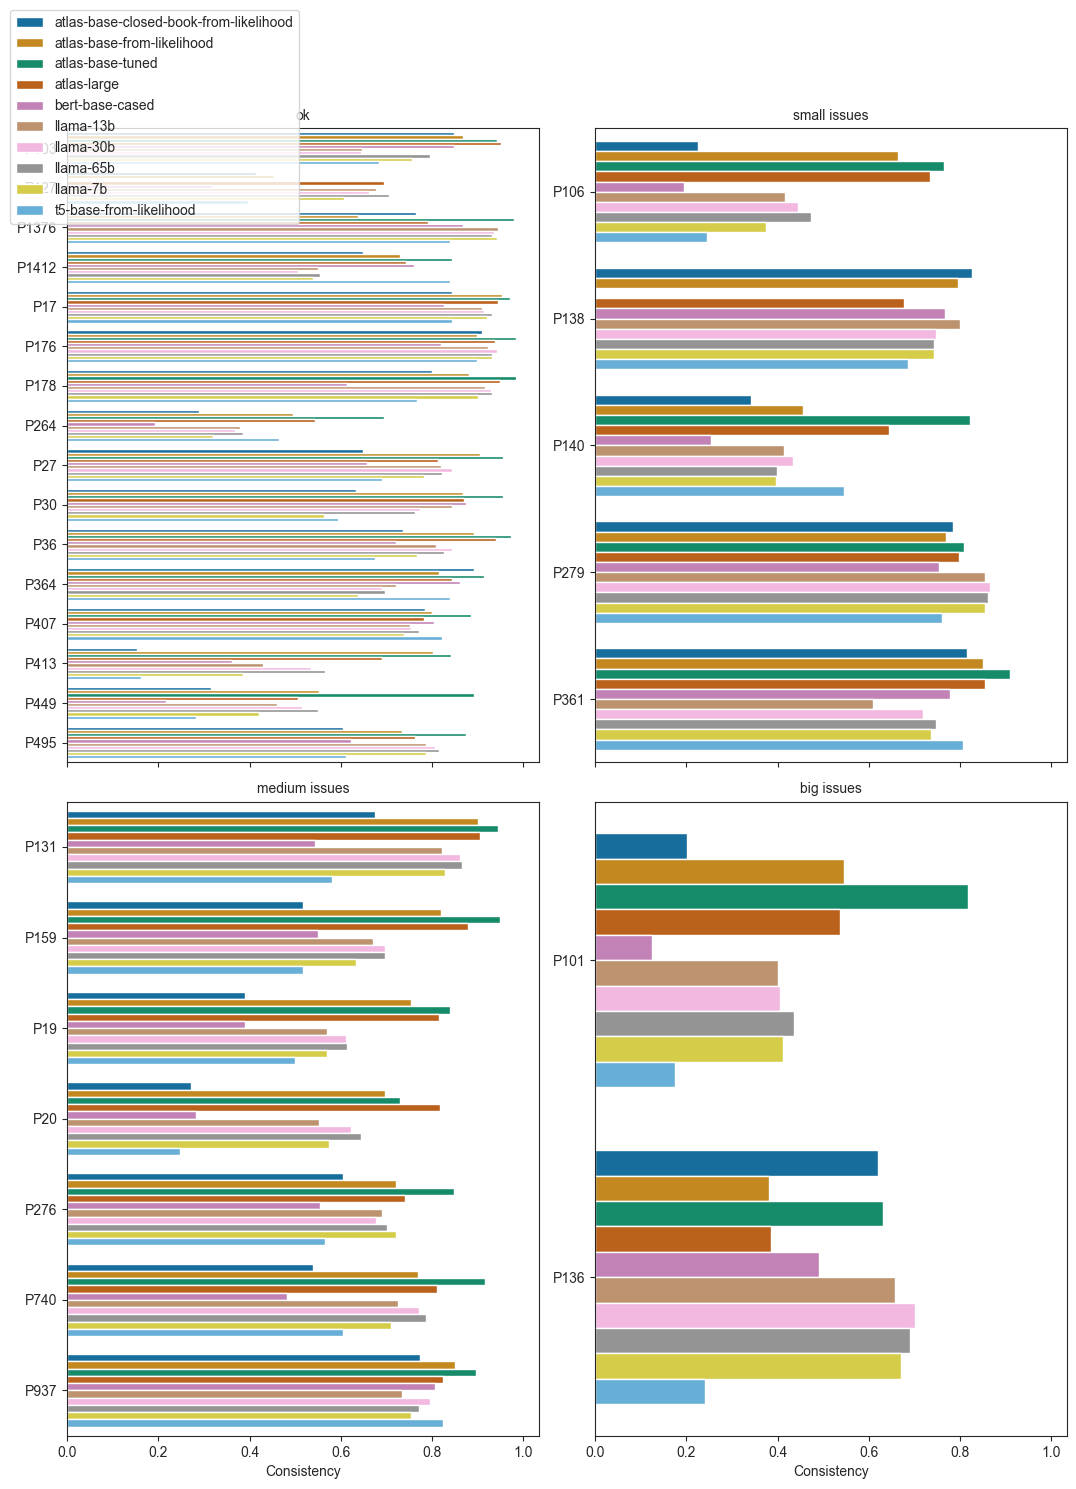

In [127]:
sns.set_style("ticks")
g = sns.FacetGrid(data.sort_values(by=["pattern","lm"]), col="options_quality", col_wrap=2, col_order=["ok", "small issues", "medium issues", "big issues"], sharey=False, despine=False, height=7, aspect=0.8)
g.map_dataframe(sns.barplot, x="consistency", y="pattern", hue="lm", palette="colorblind")
g.set_axis_labels("Consistency", "")
g.set_titles(col_template="{col_name}")
g.add_legend(bbox_to_anchor=(0.03, 1.065), loc="upper left", frameon=True)
g.savefig("data/plots/atlas_results.png")
plt.show()

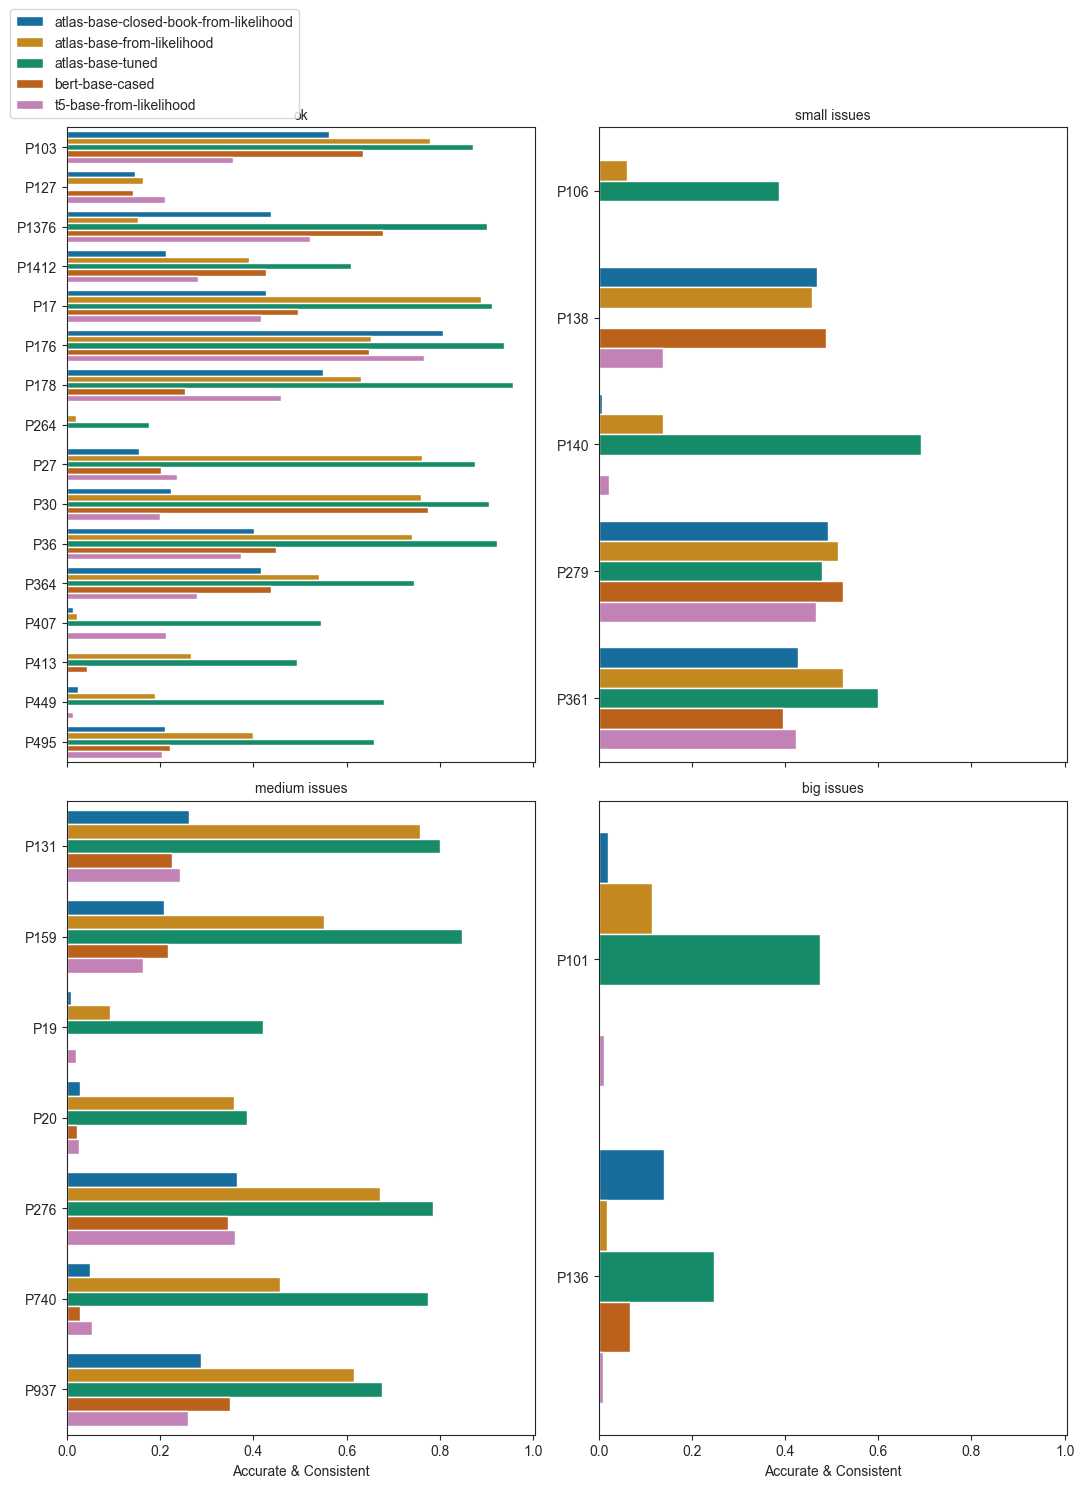

In [74]:
sns.set_style("ticks")
g = sns.FacetGrid(data.sort_values(by=["pattern","lm"]), col="options_quality", col_wrap=2, col_order=["ok", "small issues", "medium issues", "big issues"], sharey=False, despine=False, height=7, aspect=0.8)
g.map_dataframe(sns.barplot, x="lama_group_acc", y="pattern", hue="lm", palette="colorblind")
g.set_axis_labels("Accurate & Consistent", "")
g.set_titles(col_template="{col_name}")
g.add_legend(bbox_to_anchor=(0.03, 1.065), loc="upper left", frameon=True)
g.savefig("data/plots/atlas_results_acc_consistent.png")
plt.show()

In [ ]:
data.sort_values(by=["plot_pattern","lm"]).plot.bar(x="pattern", y="consistency", subplots=[""])

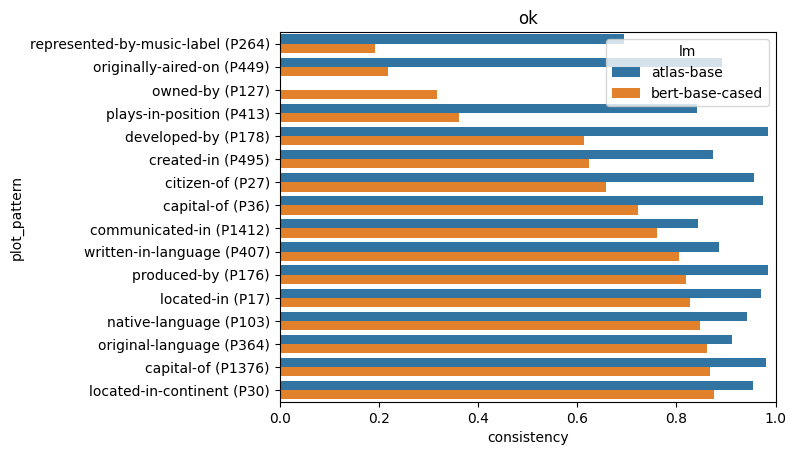

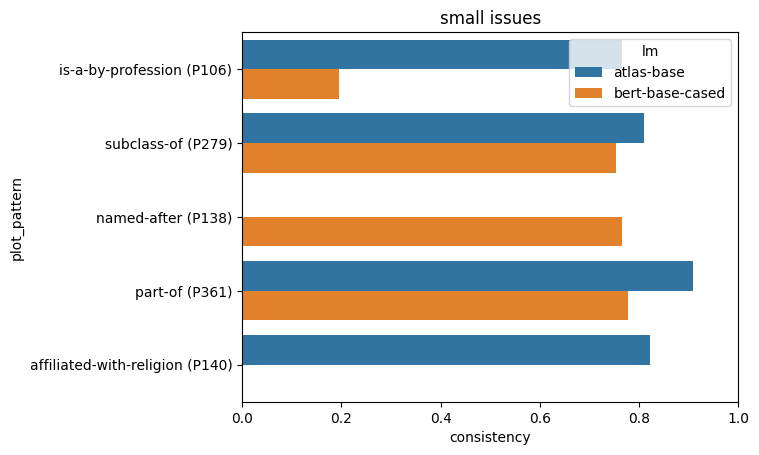

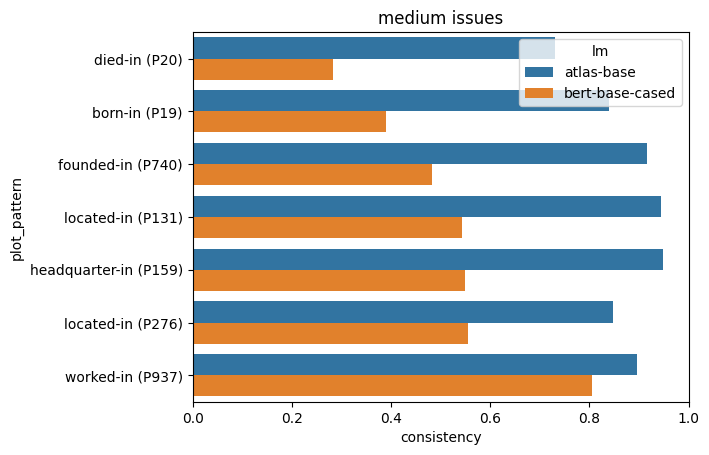

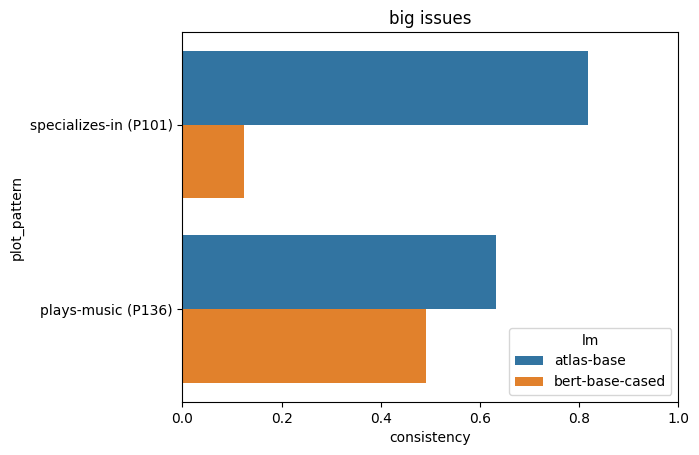

In [37]:
for key, val in relations_options_classification.items():
    #plt.figure(figsize=(5,10))
    tmp_data = data[data.pattern.isin(val)].copy()
    if len(tmp_data)==0:
        continue
    tmp_data["plot_pattern"] = tmp_data.pattern.apply(lambda val: f"{relations[val]} ({val})") 

    order = np.argsort(tmp_data[tmp_data.lm=="bert-base-cased"].consistency.values)
    order = tmp_data[tmp_data.lm=="bert-base-cased"].plot_pattern.iloc[order]
    
    sns.barplot(data=tmp_data, x="consistency", y="plot_pattern", hue="lm", order=order)
    plt.title(key)
    plt.xlim([0,1])
    plt.show()